### **Objective:** 
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

1.2. Display the top 10 rows of the dataframe:

In [2]:
import os
os.getcwd()

'c:\\Users\\karth\\Documents\\Marketing Analytics\\Marketing-Analytics\\Assignment_2'

In [3]:
df = pd.read_csv("Sales_data.csv", encoding='ISO-8859-1')

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


1.4. Convert the InvoiceDate column to datetime format:



In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':

In [7]:
df['TotalPrice'] = df['UnitPrice']*df['Quantity']

In [31]:
correction = df[df['UnitPrice']<=0]

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [11]:
unique_products = df['StockCode'].nunique()
unique_products

4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [12]:
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

# Get the top 10 products
top_10_products = top_products.head(10)
print(top_10_products)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64


2.3. How many unique customers are there in the dataset?



In [13]:
unique_Customer = df['CustomerID'].nunique()
unique_Customer

4372

2.4. Which country has the maximum number of unique customers?



In [17]:
country_unique_customers = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
country_max_customers = country_unique_customers.idxmax()
max_customers = country_unique_customers.max()

country_max_customers


'United Kingdom'

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



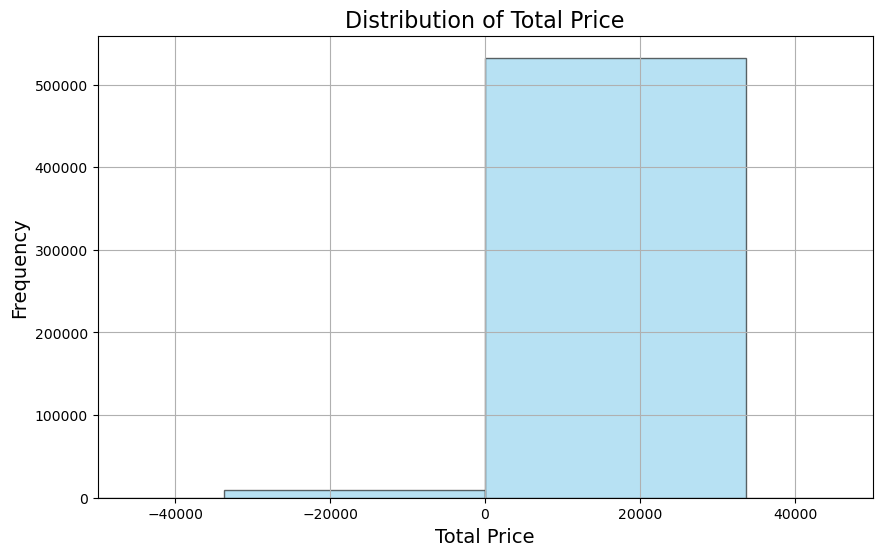

In [35]:
import matplotlib.pyplot as plt

# Assuming 'TotalPrice' column is already created
plt.figure(figsize=(10,6))
plt.hist(df['TotalPrice'], color='skyblue', edgecolor='black', alpha=0.6)
plt.xlim(-50000, 50000)
plt.title('Distribution of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [13]:
total_per_country = df.groupby('Country')['TotalPrice'].sum()

total_per_country

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

    3.2. Identify the month in which the sales were highest.



In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
best_month = monthly_sales.idxmax()
max_sales = monthly_sales.max()

best_month

11

In [15]:
max_sales

1461756.25

3.3. Compute the average unit price per product.



In [16]:
average_unit_price = df.groupby('StockCode')['UnitPrice'].mean()

average_unit_price


StockCode
10002            1.056849
10080            0.376667
10120            0.210000
10123C           0.487500
10123G           0.000000
                  ...    
gift_0001_20    15.038000
gift_0001_30    21.941250
gift_0001_40    33.566667
gift_0001_50    41.890000
m                2.550000
Name: UnitPrice, Length: 4070, dtype: float64

3.4. Compute the total quantity sold per customer.



In [17]:
total_quantity_per_customer = df.groupby('CustomerID')['Quantity'].sum()

print(total_quantity_per_customer)

CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
           ... 
18280.0      45
18281.0      54
18282.0      98
18283.0    1397
18287.0    1586
Name: Quantity, Length: 4372, dtype: int64


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



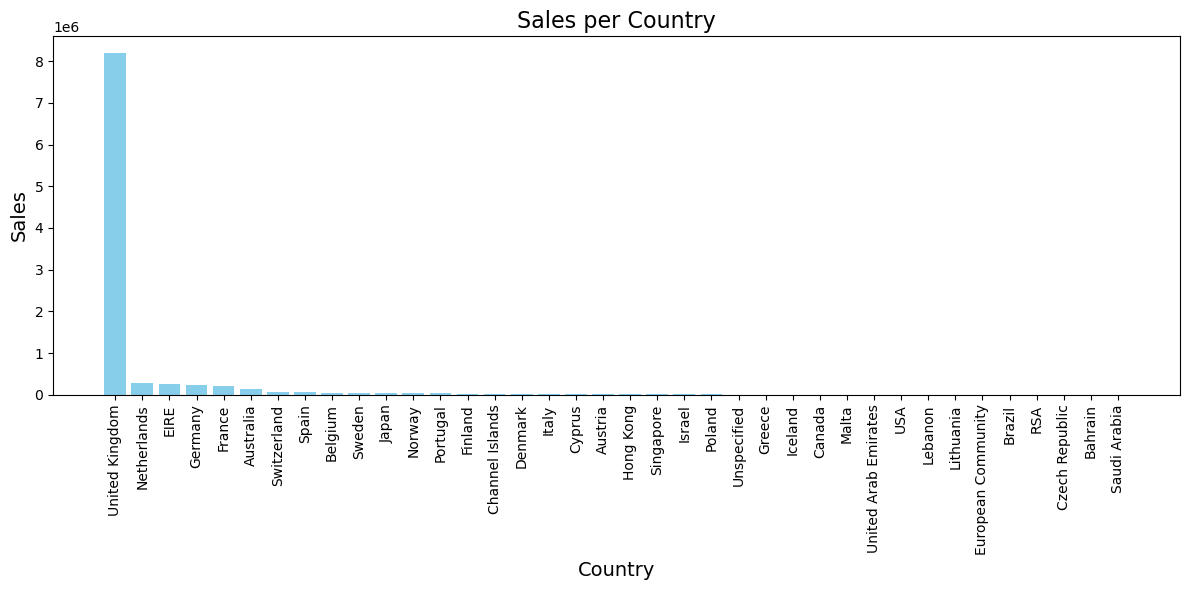

In [38]:
import matplotlib.pyplot as plt

total_sales_per_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(total_sales_per_country.index, total_sales_per_country.values, color='skyblue')

plt.title('Sales per Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

4.2. Plot a line graph to showcase the trend of sales over time.



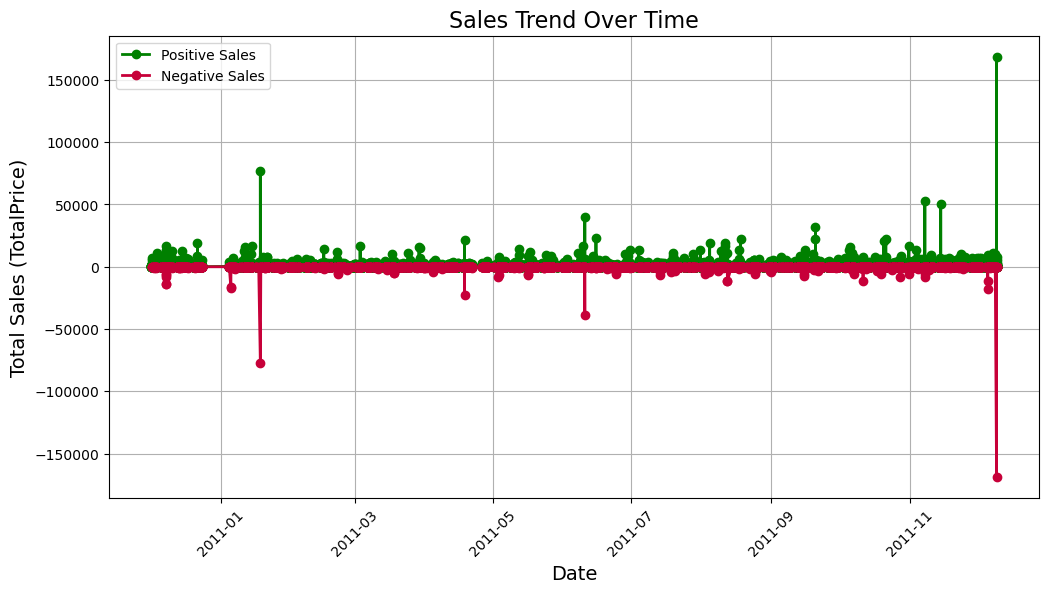

In [50]:
sales_trend = df.groupby(df['InvoiceDate'])['TotalPrice'].sum()

plt.figure(figsize=(12, 6))

# Plot positive values
plt.plot(sales_trend[sales_trend >= 0].index, sales_trend[sales_trend >= 0].values, 
         color='green', marker='o', linestyle='-', linewidth=2, label='Positive Sales')

# Plot negative values
plt.plot(sales_trend[sales_trend < 0].index, sales_trend[sales_trend < 0].values, 
         color='#C70039', marker='o', linestyle='-', linewidth=2, label='Negative Sales')

plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales (TotalPrice)', fontsize=14)
plt.grid(True)

plt.xticks(rotation=45)
plt.legend()
plt.show()


4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



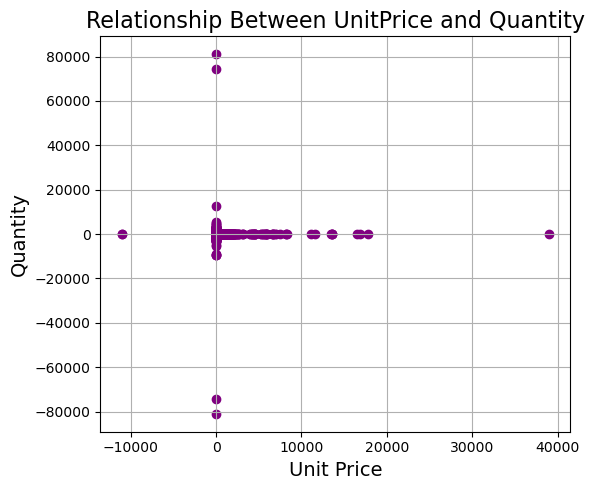

In [52]:
plt.figure(figsize=(6, 5))
plt.scatter(df['UnitPrice'], df['Quantity'], color='purple')
plt.title('Relationship Between UnitPrice and Quantity', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



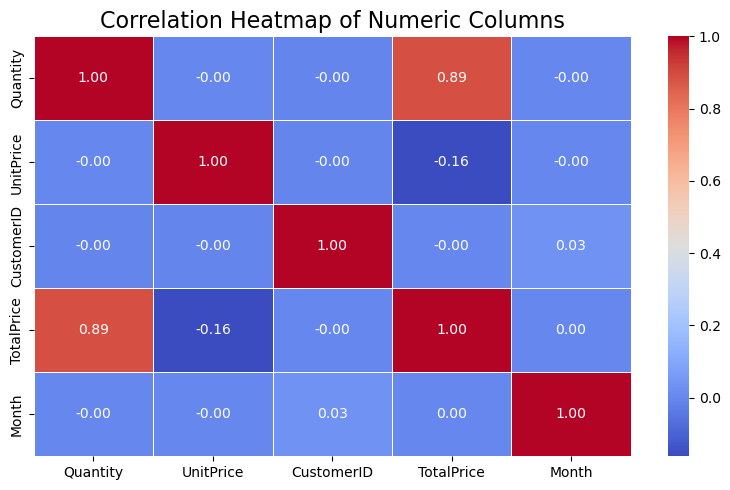

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()


## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



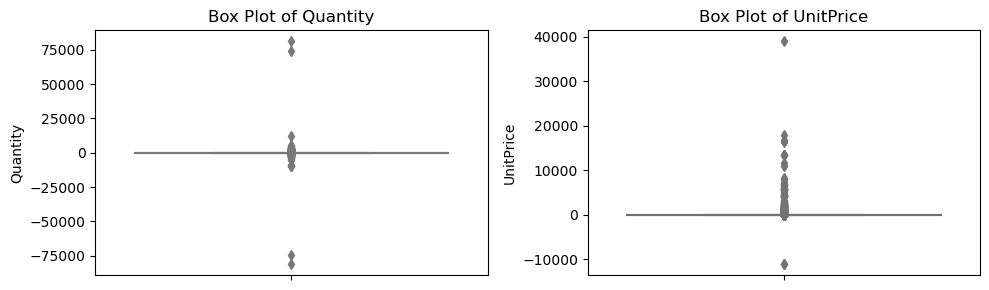

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 3))

# Box plot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'], color='lightblue')
plt.title('Box Plot of Quantity')

# Box plot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'], color='lightgreen')
plt.title('Box Plot of UnitPrice')

plt.tight_layout()
plt.show()


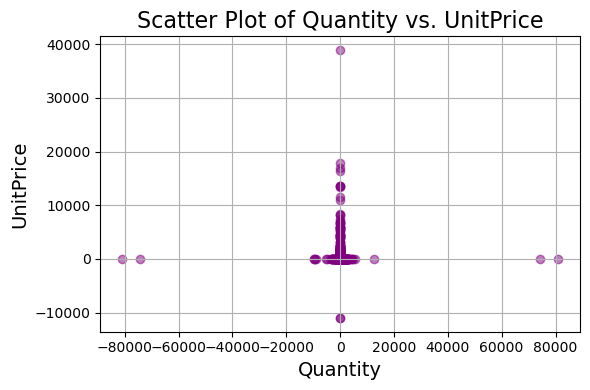

In [56]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Quantity'], df['UnitPrice'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Quantity vs. UnitPrice', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('UnitPrice', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).

In [63]:
customer_summary = df.groupby('CustomerID').agg(
    total_purchases=('InvoiceNo', 'nunique'),
    total_spend=('TotalPrice', 'sum'),
    frequency_of_purchases=('InvoiceNo', 'count'),
    avg_order_value=('TotalPrice', 'mean')
).reset_index()

customer_summary['CustomerID'] = customer_summary['CustomerID'].astype(int)

def segment_customer(row):
    if row['total_spend'] > 500 and row['total_purchases'] > 10:
        return 'High-Value Customer'
    elif row['frequency_of_purchases'] > 15:
        return 'Frequent Shopper'
    elif row['total_purchases'] == 1:  # Assuming new customers made only one purchase
        return 'New Customer'
    elif row['frequency_of_purchases'] < 5:  # At-risk based on low frequency
        return 'At-Risk Customer'
    else:
        return 'Low-Value Customer'

# Apply segmentation
customer_summary['segment'] = customer_summary.apply(segment_customer, axis=1)

customer_summary

,CustomerID,total_purchases,total_spend,frequency_of_purchases,avg_order_value,segment
0,12346,2,0.00,2,0.000000,At-Risk Customer
1,12347,7,4310.00,182,23.681319,Frequent Shopper
2,12348,4,1797.24,31,57.975484,Frequent Shopper
3,12349,1,1757.55,73,24.076027,Frequent Shopper
4,12350,1,334.40,17,19.670588,Frequent Shopper
...,...,...,...,...,...,...
4367,18280,1,180.60,10,18.060000,New Customer
4368,18281,1,80.82,7,11.545714,New Customer
4369,18282,3,176.60,13,13.584615,Low-Value Customer
4370,18283,16,2094.88,756,2.771005,High-Value Customer


5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



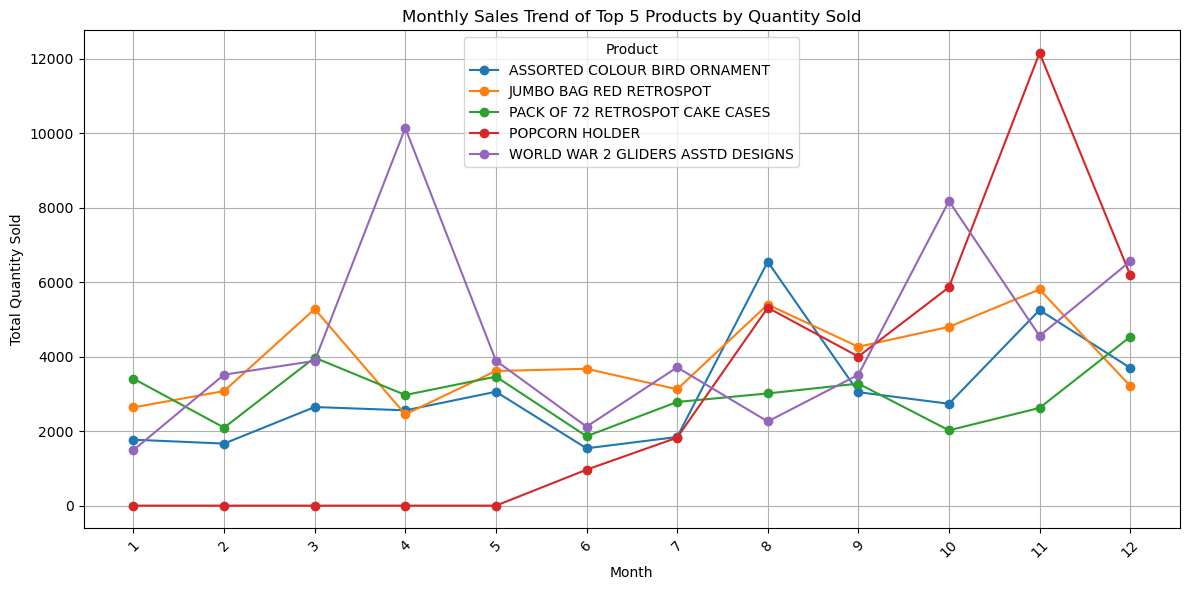

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate quantity sold per product per month
monthly_sales = df.groupby(['Month', 'StockCode', 'Description']).agg(total_quantity=('Quantity', 'sum')).reset_index()

# Find top 5 products by total quantity sold
top_products = monthly_sales.groupby(['StockCode', 'Description'])['total_quantity'].sum().nlargest(5).index

# Filter for top products
top_products_sales = monthly_sales[monthly_sales.set_index(['StockCode', 'Description']).index.isin(top_products)]

# Pivot the data for plotting
pivot_data = top_products_sales.pivot(index='Month', columns='Description', values='total_quantity').fillna(0)

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
for product in pivot_data.columns:
    plt.plot(pivot_data.index.astype(str), pivot_data[product], marker='o', label=product)

plt.title('Monthly Sales Trend of Top 5 Products by Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.grid()
plt.tight_layout()
plt.show()


# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [72]:
# Extract Year, Month, Day, and Hour
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8


6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [73]:
# Create 'ReturnFlag' column
df['ReturnFlag'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour,ReturnFlag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,0


## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [74]:
# Create today's date for calculating recency
today_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # Assuming today is the day after the last purchase

# Recalculate RFM values
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                  # Frequency
    'TotalPrice': 'sum'                                   # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the updated RFM DataFrame
print(rfm_df.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40


7.2. Normalize the RFM matrix with StandardScaler:

In [75]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Normalize the RFM values
rfm_scaled = rfm_df[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = scaler.fit_transform(rfm_scaled)

# Create a DataFrame for the scaled values
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Add the CustomerID back to the scaled DataFrame
rfm_scaled_df['CustomerID'] = rfm_df['CustomerID'].values

# Display the normalized RFM DataFrame
print(rfm_scaled_df.head())


    Recency  Frequency  Monetary  CustomerID
0  2.322023  -0.391720 -0.231001     12346.0
1 -0.893733   0.382657  0.293432     12347.0
2 -0.169196  -0.266959 -0.012316     12348.0
3 -0.725005  -0.086271 -0.017146     12349.0
4  2.163220  -0.327188 -0.190312     12350.0


7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

In [76]:
rfm_scaled_df.shape

(4372, 4)

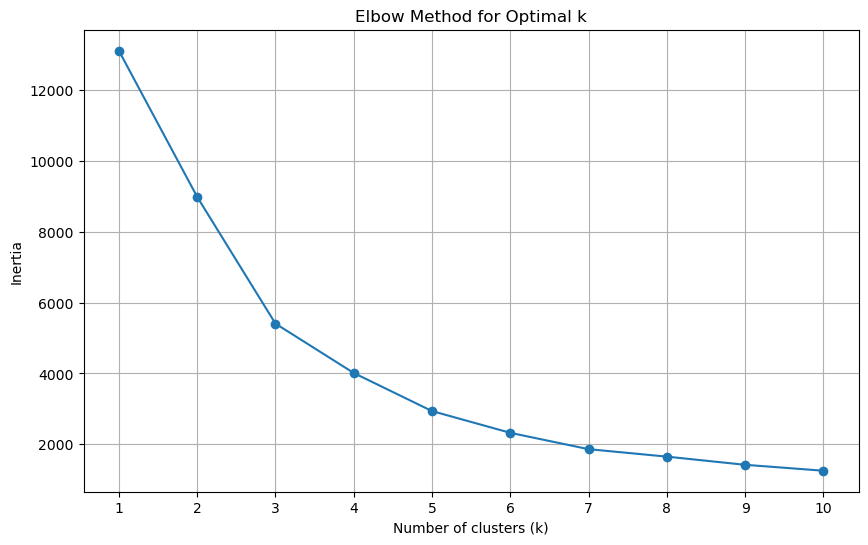

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop the CustomerID column for clustering
rfm_scaled = rfm_scaled_df.drop(columns=['CustomerID'])

# Find the optimal number of clusters using the Elbow method
inertia = []
max_clusters = 10  # You can adjust this based on your dataset size

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.show()

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [ ]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Features for prediction
X = df[['UnitPrice', 'Quantity', 'TotalPrice']]  # You can add more features if necessary
y = df['ReturnFlag']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: Support Vector Classifier (SVM)
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

# Evaluate SVM model performance
model_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc),
    'Recall': recall_score(y_test, y_pred_svc),
    'F1-Score': f1_score(y_test, y_pred_svc)
}

performance_df = pd.DataFrame(model_performance, index=['SVM'])
print(performance_df)

# Plot Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svc))

8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [ ]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming df is the dataframe containing the features and 'TotalPrice' is the target
# Feature selection
X = df[['UnitPrice', 'Quantity', 'Country', 'CustomerID']]  # Add more features if needed
y = df['TotalPrice']

# Define preprocessing for numerical and categorical features
numerical_features = ['UnitPrice', 'Quantity', 'CustomerID']
categorical_features = ['Country']

# Preprocessing: Imputation, scaling for numeric data, and one-hot encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                                 ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Preprocess the features
X_processed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [ ]:
#pip install mlxtend

In [ ]:
# Randomly sample 10% of the dataset
df_sample = df.sample(frac=0.1, random_state=42)

In [ ]:
# Create a basket of items
basket = (df_sample.groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to 1s and 0s (1 if the product was purchased, else 0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets with lower min_support
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Check for found frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)  # Adjust min_threshold as needed
    print("Association Rules:")
    print(rules)
else:
    print("No frequent itemsets found.")

In [ ]:
# Extract frequent itemsets with lower support
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Filter to keep itemsets with more than one item
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

# Generate association rules
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    print("Association Rules:")
    print(rules)
else:
    print("No frequent itemsets found.")

# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [ ]:
import pandas as pd

# Step 1: Identify the top 20% products generating 80% of revenue
product_revenue = df.groupby('StockCode')['TotalPrice'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='TotalPrice', ascending=False)
product_revenue['CumulativeRevenue'] = product_revenue['TotalPrice'].cumsum()
total_revenue = product_revenue['TotalPrice'].sum()
product_revenue['CumulativePercentage'] = product_revenue['CumulativeRevenue'] / total_revenue * 100

# Get the products that contribute to 80% of the revenue
top_20_percent_products = product_revenue[product_revenue['CumulativePercentage'] <= 80]
print("Top 20% Products generating 80% of Revenue:")
print(top_20_percent_products)

# Step 2: Identify the top 20% customers responsible for 80% of sales
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_sales = customer_sales.sort_values(by='TotalPrice', ascending=False)
customer_sales['CumulativeSales'] = customer_sales['TotalPrice'].cumsum()
total_sales = customer_sales['TotalPrice'].sum()
customer_sales['CumulativePercentage'] = customer_sales['CumulativeSales'] / total_sales * 100

# Get the customers that contribute to 80% of the sales
top_20_percent_customers = customer_sales[customer_sales['CumulativePercentage'] <= 80]
print("\nTop 20% Customers responsible for 80% of Sales:")
print(top_20_percent_customers)

12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

In [ ]:
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()

# Step 2: Calculate Rolling Average and Standard Deviation
window_size = 7 
daily_sales['RollingMean'] = daily_sales['TotalPrice'].rolling(window=window_size).mean()
daily_sales['RollingStd'] = daily_sales['TotalPrice'].rolling(window=window_size).std()

# Step 3: Define Anomalies
threshold = 2  
daily_sales['UpperBound'] = daily_sales['RollingMean'] + (threshold * daily_sales['RollingStd'])
daily_sales['LowerBound'] = daily_sales['RollingMean'] - (threshold * daily_sales['RollingStd'])

# Anomalies
daily_sales['Anomaly'] = (daily_sales['TotalPrice'] > daily_sales['UpperBound']) | (daily_sales['TotalPrice'] < daily_sales['LowerBound'])

# Step 4: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalPrice'], label='Daily Sales', color='blue')
plt.plot(daily_sales['InvoiceDate'], daily_sales['RollingMean'], label='Rolling Mean', color='orange', linewidth=2)
plt.fill_between(daily_sales['InvoiceDate'], 
                 daily_sales['LowerBound'], 
                 daily_sales['UpperBound'], 
                 color='gray', alpha=0.2, label='Anomaly Bounds')
plt.scatter(daily_sales[daily_sales['Anomaly']]['InvoiceDate'], 
            daily_sales[daily_sales['Anomaly']]['TotalPrice'], 
            color='red', label='Anomalies', marker='o', s=100)

plt.title('Sales Anomalies Detection')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

transactions_df = df[['InvoiceNo', 'StockCode', 'Quantity']]

# Step 1: Preprocess the Data
# Convert StockCode to categorical to save memory
transactions_df['StockCode'] = transactions_df['StockCode'].astype('category')

# Create a basket matrix with a memory-efficient approach
basket = (transactions_df
          .groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack(fill_value=0))

# Convert quantities to 1s and 0s (purchase or not)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Step 2: Generate Frequent Itemsets
# Use a lower min_support to avoid memory issues; adjust as necessary
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Step 3: Extract Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 4: Filter Rules with High Lift and High Confidence
high_confidence_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.5)]

# Step 5: Analyze Antecedents with More than One Item
multi_item_rules = high_confidence_rules[high_confidence_rules['antecedents'].apply(lambda x: len(x) > 1)]

# Display the filtered rules
print("High Lift and Confidence Rules:")
print(high_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nMulti-Item Antecedent Rules:")
print(multi_item_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.